<h2 style="color:#00D5FA;">Brahim SAADI<h2> 

![Sentiment Analysis](https://www.smartdatacollective.com/wp-content/uploads/2018/03/Natural-Language-Processing-NLP-AI.jpg)

# introduction:
# Natural Language Processing

**Natural Language Processing or NLP** is a branch of Artificial Intelligence which deal with bridging the machines understanding humans in their Natural Language. Natural Language can be in form of text or sound, which are used for humans to communicate each other. NLP can enable humans to communicate to machines in a natural way. 


**Text Classification** is a process involved in Sentiment Analysis. It is classification of peoples opinion or expressions into different sentiments. Sentiments include *Positive, Neutral*, and *Negative*, *Review Ratings* and *Happy, Sad*. Sentiment Analysis can be done on different consumer centered industries to analyse people's opinion on a particular product or subject.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import seaborn as sns
from sklearn import metrics


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

[nltk_data] Downloading package stopwords to C:\Users\brahim
[nltk_data]     saadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### data loading

In [2]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<h2 style="color:#00D5FA;">1 - Data preprocessing</h2>

In [3]:
# naming columns\

df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
# we need only text column so we drop others

df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [5]:
# encoding function

lab_to_sentiment = {0:0, 4:1}
def label_decoder(label):
    return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
# we will take only 100000 tweet

neg = df[df["sentiment"] == 0].head(50000)
pos = df[df["sentiment"] == 1].head(50000)
df = pd.concat([neg, pos], ignore_index=True)

<h2 style="color:#00D5FA;">2 - Text preprocessing</h2>

<b>Tweet texts often consists of other `user mentions`, `hyperlink texts`, `emoticons` and `punctuations`. 
<br>In order to use them for learning using a Language Model. We cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleaning methods.</b>

Stemming/ Lematization
For grammatical reasons, documents are going to use different forms of a word, such as *write, writing and writes.* Additionally, there are families of derivationally related words with similar meanings. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

Stemming usually refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes. 

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base and dictionary form of a word.

![Stemming and Lematization](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F4010658%2Ff0e0abfea00346cbdd6b6753a2cb1cb5%2F1_OTjdJlYF5vRIzpBfOw75KA.png?generation=1600866066577474&alt=media)

### Hyperlinks and Mentions
Twitter is a social media platform where people can tag and mentions other people's ID and share videos and blogs from internet. So the tweets often contain lots of Hyperlinks and twitter mentions.

- Twitter User Mentions - Eg. @brahim, @youness
- Hyperlinks - Eg. https://keras.io, https://tensorflow.org


### Stopwords
Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification. Some stopwords are...
![Stopwords English](https://4.bp.blogspot.com/-yiEr-jCVv38/Wmk10d84DYI/AAAAAAAAk0o/IfgjfjpgrxM5NosUQrGw7PtLvgr6DAG8ACLcBGAs/s1600/Screen%2BShot%2B2018-01-24%2Bat%2B5.41.21%2BPM.png)

In [7]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [8]:
# cleaning text function

def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [9]:
df.text = df.text.apply(lambda x: preprocess(x, True))

In [10]:
df.head(5)

,sentiment,text
0,0,awww bummer shoulda got david carr third day
1,0,upset updat facebook text might cri result sch...
2,0,dive mani time ball manag save 50 rest go bound
3,0,whole bodi feel itchi like fire
4,0,behav mad see


<h2 style="color:#00D5FA;">3 - Visualisation</h2>

### Positive words

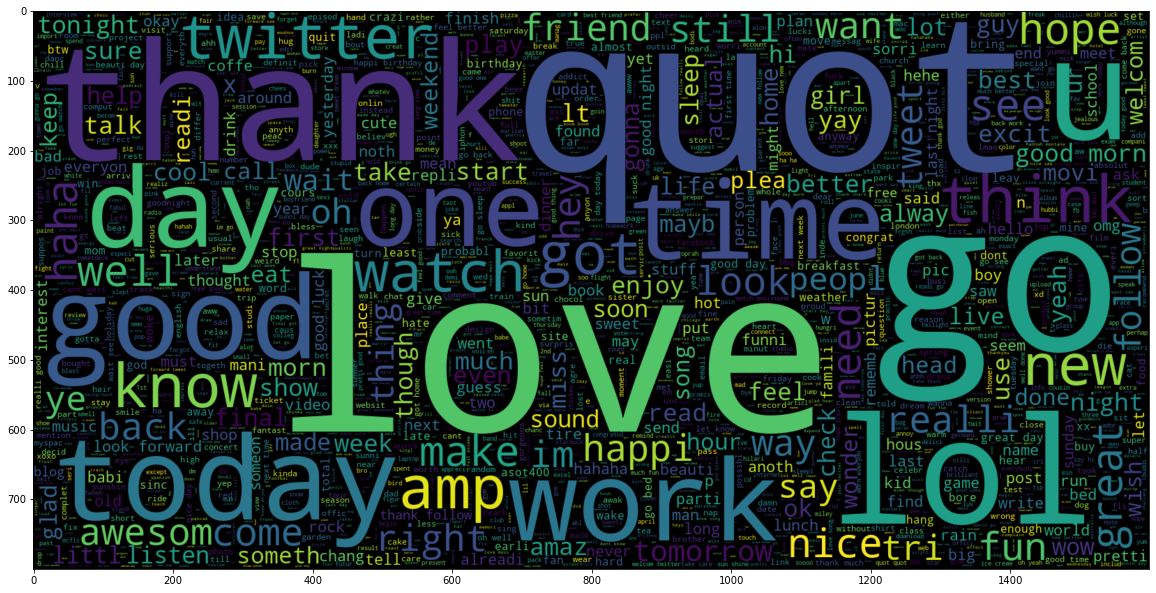

In [11]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.show()

### Negative words

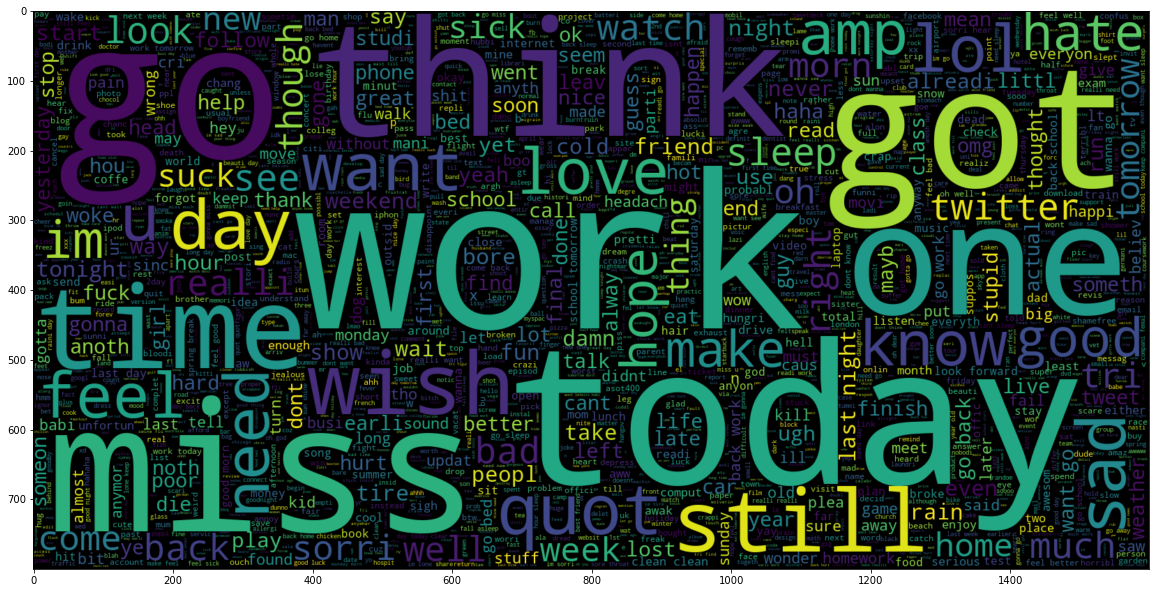

In [12]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.show()

<h2 style="color:#00D5FA;">4 - Classification model</h2>

<h3 style="color:#00D5FA;">train and test split</h3>

In [13]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [14]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 80000
Test Data size 20000


In [15]:
train_data.head(5)

,sentiment,text
91526,1,gonna give anoth chanc need lesson afraid
19416,0,parent drunk fml text yeah
99079,1,purchas tweeti os x today
45086,0,oh man forgot pazooki dammit man u gotta like ...
54659,1,lol supp aint fuck


<h3 style="color:#00D5FA;">Tokenization</h3><br>
Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called *tokens* , perhaps at the same time throwing away certain characters, such as punctuation. The process is called **Tokenization.**

![Tokenization](https://miro.medium.com/max/1050/0*EKgminT7W-0R4Iae.png)

`tokenizer` create tokens for every word in the data corpus and map them to a index using dictionary.

`word_index` contains the index for each word

`vocab_size` represents the total number of word in the data corpus

In [16]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 38742


In [17]:
from keras_preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (80000, 30)
Testing X Shape: (20000, 30)


In [18]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (80000, 1)
y_test shape: (20000, 1)


<h3 style="color:#00D5FA;"> Word Emdedding</h3><br>
In Language Model, words are represented in a way to intend more meaning and for learning the patterns and contextual meaning behind it. 

**Word Embedding** is one of the popular representation of document vocabulary.It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

Basically, it's a feature vector representation of words which are used for other natural language processing applications.

We download the pre-trained embedding and use it in our model.

The pretrained Word Embedding like **GloVe & Word2Vec** gives more insights for a word which can be used for classification.

![Tokenization](https://miro.medium.com/max/1100/0*SrheQHZH4_II-Yd9.webp)


I use **GloVe Embedding from Stanford AI** which can be found [here](https://nlp.stanford.edu/projects/glove/)<br>
you can also download the zip by clicing this [link](http://nlp.stanford.edu/data/glove.6B.zip) <br>
<b>Or uncomment the code below</b>

In [19]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'

In [20]:
embeddings_index = {}

f = open(GLOVE_EMB, encoding='cp437')
for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [21]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [22]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

<h3 style="color:#00D5FA;">Model creation</h3>

![Sentiment Analysis](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/614fc586739fea6fc08532cf_lstm.png)

In [23]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [24]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           11622600  
                                                                 
 spatial_dropout1d (SpatialD  (None, 30, 300)          0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 26, 64)            96064     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 512)               66048 

![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)


In [27]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=10,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
79/79 [==============================] - 86s 1s/step - loss: 0.6114 - accuracy: 0.6578 - val_loss: 0.5622 - val_accuracy: 0.7057 - lr: 0.0010
Epoch 2/10
79/79 [==============================] - 81s 1s/step - loss: 0.5621 - accuracy: 0.7053 - val_loss: 0.5467 - val_accuracy: 0.7174 - lr: 0.0010
Epoch 3/10
79/79 [==============================] - 81s 1s/step - loss: 0.5410 - accuracy: 0.7235 - val_loss: 0.5377 - val_accuracy: 0.7283 - lr: 0.0010
Epoch 4/10
79/79 [==============================] - 80s 1s/step - loss: 0.5213 - accuracy: 0.7378 - val_loss: 0.5400 - val_accuracy: 0.7257 - lr: 0.0010
Epoch 5/10
79/79 [==============================] - 80s 1s/step - loss: 0.5091 - accuracy: 0.7466 - val_loss: 0.5371 - val_accuracy: 0.7285 - lr: 0.0010
Epoch 6/10
79/79 [==============================] - 81s 1s/step - loss: 0.4895 - accuracy: 0.7599 - val_loss: 0.5358 - val_accuracy: 0.7276 - lr: 0.0010
Epoch 7/10
79/79 [==============================] - 851s 11s/step - loss: 0.4800 -

In [28]:
a = model.predict(x_test)

625/625 [==============================] - 9s 13ms/step


In [29]:
for i in range(20000):
    if a[i]>0.5:
        a[i] = 1
    else:
        a[i] = 0

<h3 style="color:#00D5FA;">Model evaluation</h3>

<AxesSubplot:>

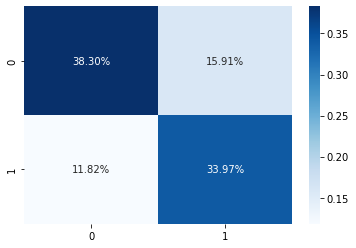

In [30]:
confusion_matrix = metrics.confusion_matrix(a, y_test)

sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<h3 style="color:#00D5FA;">Use the model to classify single tweet</h3>

In [85]:
tweet_to_classify = "this movie is awesome"

In [86]:
make_prediction = pad_sequences(tokenizer.texts_to_sequences(tweet_to_classify),
                        maxlen = MAX_SEQUENCE_LENGTH)

classification = model.predict(make_prediction)[0][0]

1/1 [==============================] - 0s 32ms/step


In [87]:
if classification >0.5:
    print("positive tweet")
else:
    print("Negative tweet")

positive tweet
